In [55]:
import numpy as np
import pandas as pd
import datetime
import time
from matplotlib import pyplot as plt
import glob
import os
from urllib.request import urlopen
from sklearn import datasets, linear_model
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn import preprocessing
import statsmodels.formula.api as sm
from functools import reduce
from statsmodels.tsa.stattools import ARMA
from pandas.plotting import scatter_matrix
from seaborn import heatmap
from sklearn.preprocessing import MinMaxScaler
import xgboost
from collections import OrderedDict
%matplotlib inline

In [5]:
states_ls = ['Arizona', 'California','Colorado', 'District of Columbia','Florida','Georgia','Illinois','Massachusetts','Michigan','Minnesota','Nevada','New York','North Carolina','Ohio','Oregon','Texas','Washington']
states_abbrev = ['AZ', 'CA', 'CO', 'DC', 'FL', 'GA', 'IL', 'MA', 'MI', 'MN', 'NV', 'NY', 'NC', 'OH', 'OR', 'TX', 'WA']

In [6]:
state_combo = []
for i in range(len(states_ls)):
    df = pd.read_pickle('state_combo_' + states_abbrev[i] + '.pkl')
    df = df.dropna()
    state_combo.append(df)

In [7]:
len(state_combo)

17

In [8]:
state_combo[1]

,State,State Abbrev,FMHPI,Los Angelos_CA_Case_Shiller,San Diego_CA_Case_Shiller,San Francisco_CA_Case_Shiller,Population,Violent crime total,Property crime total,Violent Crime rate,Property crime rate,Residence Pop,Homeownership Rate,AHPI,Real GDP,Median Household Income,Wage,Adjusted Gross Income,ZHVI
Date,,,,,,,,,,,,,,,,,,,
1997,California,CA,67.841368,76.604550,74.575563,72.765073,4555000,28411.0,299323.0,623.7,6571.3,32217.708,55.7,207.1925,1378653.7,39694.0,176906,213919,167900.0
1998,California,CA,69.548175,86.986654,84.364426,81.648938,4669000,26984.0,280001.0,577.9,5997.0,32682.794,56.0,224.5500,1470393.0,40934.0,182207,224770,181500.0
1999,California,CA,72.334929,96.107066,94.819890,92.511479,4778332,26334.0,255401.0,551.1,5345.0,33145.121,55.7,242.5625,1582377.4,43629.0,193606,235668,201800.0
2000,California,CA,77.074730,105.980292,109.145276,115.940704,5130632,27281.0,271811.0,531.7,5297.8,33987.977,57.1,273.0250,1709938.7,46816.0,205080,246808,233900.0
2001,California,CA,78.927888,116.477033,124.928900,130.744054,5306966,28675.0,293874.0,540.3,5537.5,34479.458,58.2,307.8100,1702775.7,47262.0,204445,243717,262400.0
2002,California,CA,80.623008,132.431543,142.083997,136.753908,5441125,30171.0,318296.0,554.5,5849.8,34871.843,57.7,342.1900,1743650.6,47437.0,205784,242499,305100.0
2003,California,CA,74.257179,157.673899,167.968760,147.494130,5579222,28638.0,314335.0,513.3,5634.0,35253.159,58.9,384.8100,1825424.0,49300.0,214044,258044,366700.0
2004,California,CA,61.706712,202.598047,215.366905,171.272134,5739879,28952.0,291203.0,504.4,5073.3,35574.576,59.7,472.1325,1902318.8,49222.0,227806,273614,464600.0
2005,California,CA,53.978536,243.147625,243.836779,206.767183,5953007,30478.0,287345.0,512.0,4827.0,35827.943,59.7,582.7575,1990140.8,51755.0,231129,279715,528800.0


### Part 1 EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c13251198>,
      dtype=object)

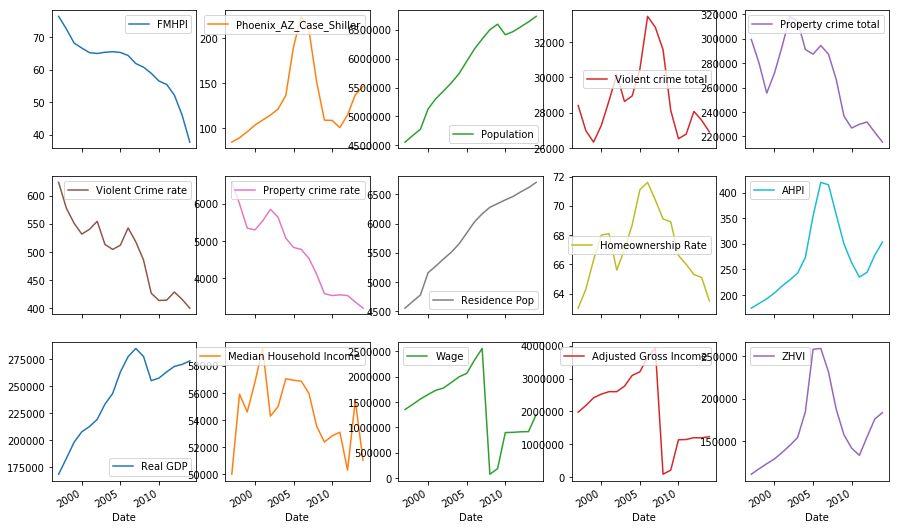

In [7]:
state_combo[0].plot(subplots = True, layout=(4, 5), figsize=(15, 13))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c234ec7b8>,
      dtype=object)

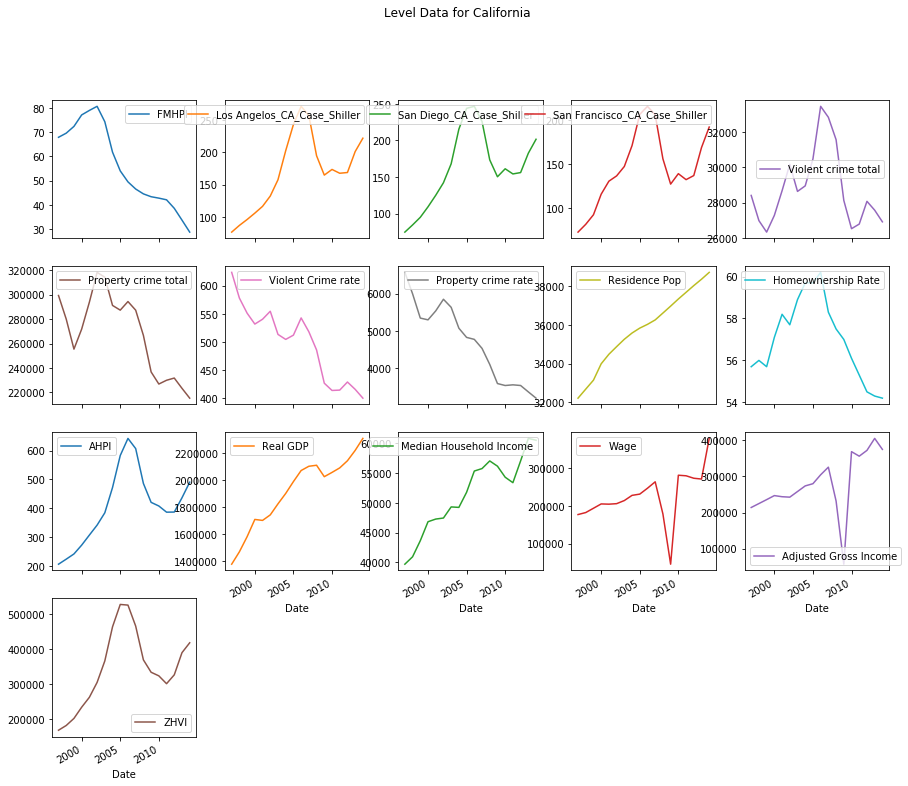

In [56]:
state_combo[1].plot(subplots = True, layout=(4, 5), figsize=(15, 13), title = 'Level Data for ' + states_ls[1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c217e9be0>,
      dtype=object)

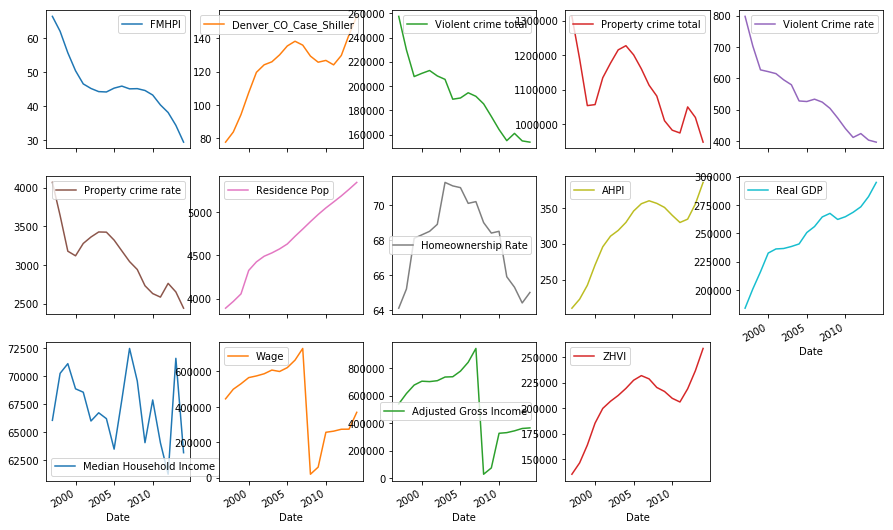

In [55]:
state_combo[2].plot(subplots = True, layout=(4, 5), figsize=(15, 13))

### Based on different variables, do pct/diff/normalization

In [9]:
state_feature_combo = []
for i in range(len(states_ls)):
    df =  state_combo[i].iloc[:,2:].astype('float64')
    df = 100. * df.pct_change()
    
    state_feature_combo.append(df.dropna(how='any'))

In [10]:
state_feature_combo[1]

,FMHPI,Los Angelos_CA_Case_Shiller,San Diego_CA_Case_Shiller,San Francisco_CA_Case_Shiller,Population,Violent crime total,Property crime total,Violent Crime rate,Property crime rate,Residence Pop,Homeownership Rate,AHPI,Real GDP,Median Household Income,Wage,Adjusted Gross Income,ZHVI
Date,,,,,,,,,,,,,,,,,
1998,2.515880,13.552856,13.126100,12.208970,2.502744,-5.022702,-6.455234,-7.343274,-8.739519,1.443573,0.538600,8.377475,6.654267,3.123898,2.996507,5.072481,8.100060
1999,4.006940,10.484841,12.393214,13.303958,2.341658,-2.408835,-8.785683,-4.637481,-10.872103,1.414588,-0.535714,8.021599,7.615950,6.583769,6.256071,4.848512,11.184573
2000,6.552575,10.273153,15.107997,25.325749,7.372866,3.596111,6.425190,-3.520232,-0.883068,2.542926,2.513465,12.558619,8.061370,7.304774,5.926469,4.726989,15.906838
2001,2.404366,9.904427,14.461115,12.768036,3.436887,5.109783,8.117037,1.617453,4.524520,1.446044,1.926445,12.740592,-0.418904,0.952666,-0.309635,-1.252391,12.184694
2002,2.147683,13.697558,13.731888,4.596656,2.527979,5.217088,8.310364,2.628170,5.639729,1.138025,-0.859107,11.169228,2.400486,0.370276,0.654944,-0.499760,16.272866
2003,-7.895797,19.060683,18.217930,7.853685,2.538023,-5.081038,-1.244439,-7.430117,-3.689015,1.093478,2.079723,12.455069,4.689781,3.927314,4.013918,6.410336,20.190102
2004,-16.901353,28.491810,28.218428,16.121322,2.879559,1.096445,-7.359028,-1.733879,-9.952077,0.911740,1.358234,22.692368,4.212435,-0.158215,6.429519,6.033855,26.697573
2005,-12.524043,20.014792,13.219243,20.724357,3.713110,5.270793,-1.324849,1.506741,-4.854828,0.712214,0.000000,23.430922,4.616576,5.146073,1.458697,2.229784,13.818338
2006,-8.402698,11.575028,1.123671,4.447389,3.583248,9.770982,2.451409,5.976563,-1.095919,0.539409,0.837521,10.147017,4.122130,6.886291,6.752506,8.814686,-0.359304


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c165b7f98>,
      dtype=object)

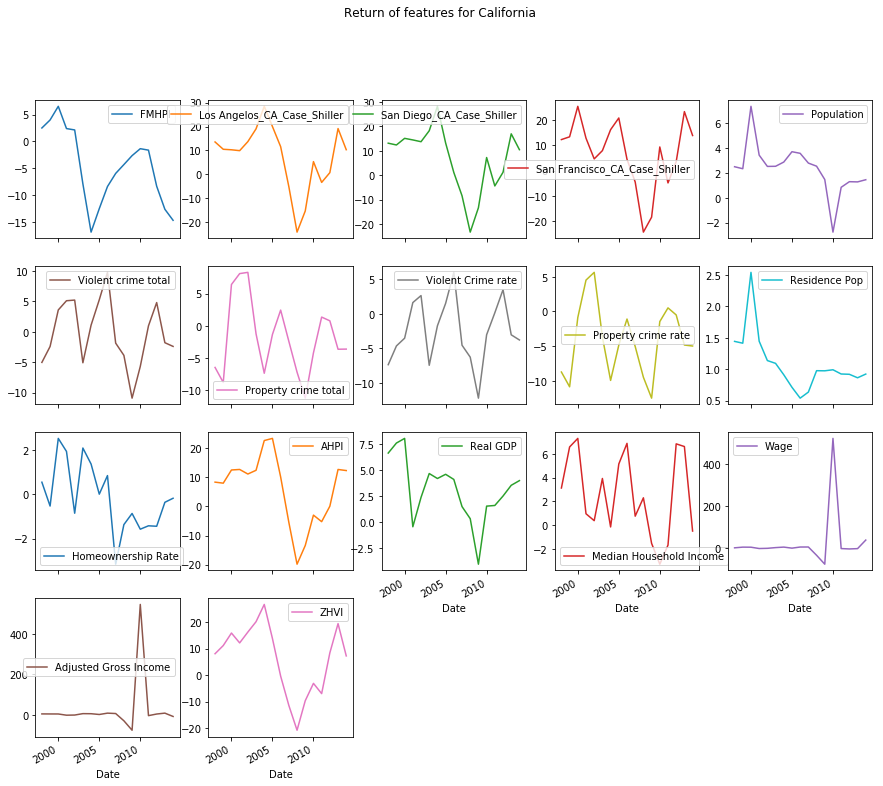

In [9]:
state_feature_combo[1].plot(subplots = True, layout=(4, 5), figsize=(15, 13), title = 'Return of features for ' + states_ls[1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c16eee860>,
      dtype=object)

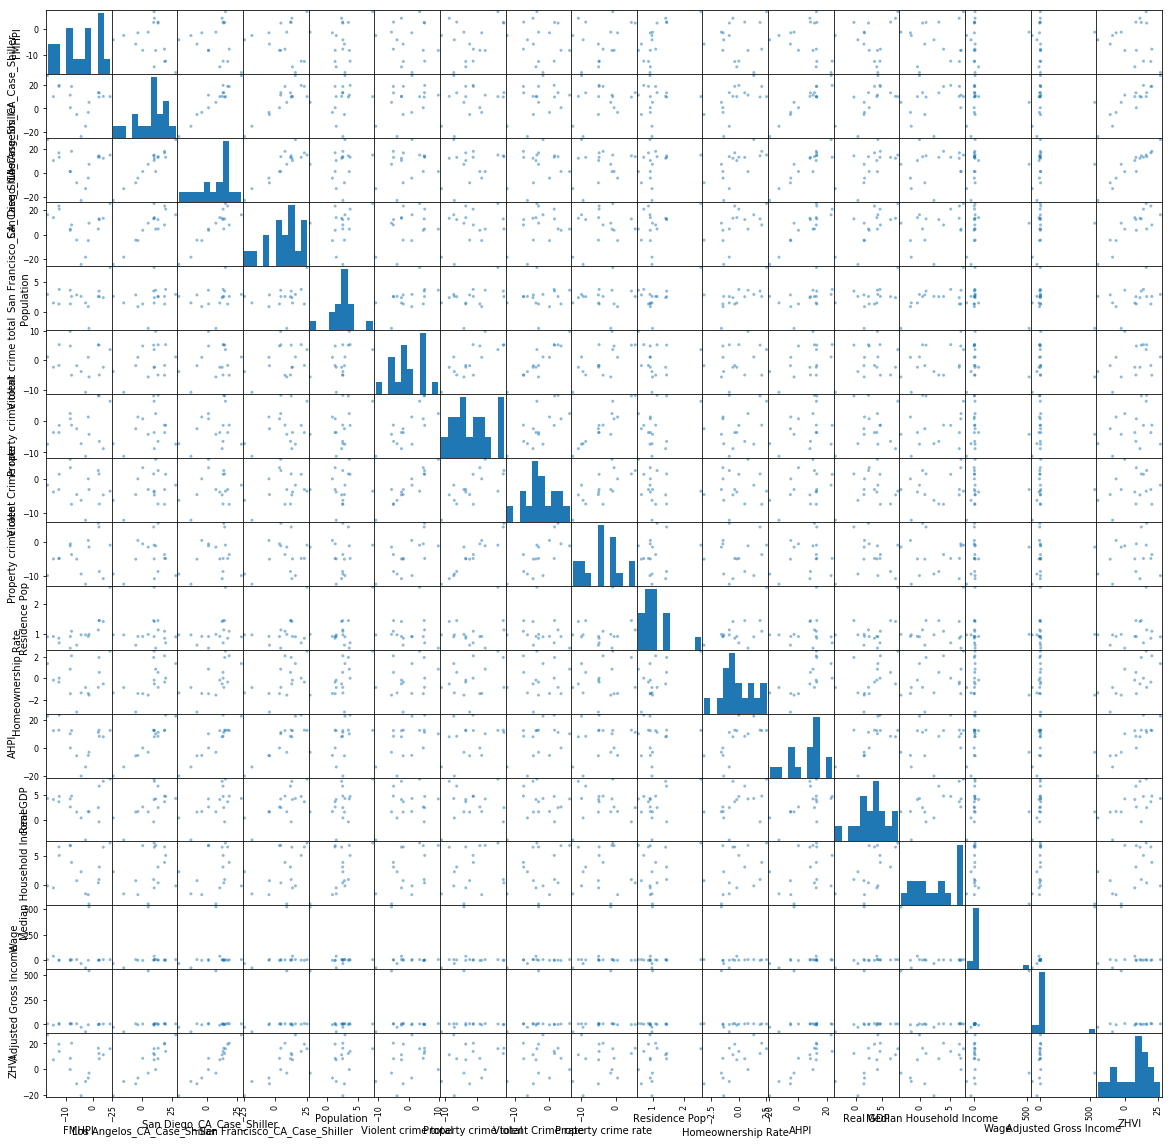

In [10]:
scatter_matrix(state_feature_combo[1], figsize=(20,20))

In [11]:
state_feature_combo[1].corr()['ZHVI']

FMHPI                           -0.184157
Los Angelos_CA_Case_Shiller      0.914286
San Diego_CA_Case_Shiller        0.953165
San Francisco_CA_Case_Shiller    0.831915
Population                       0.300206
Violent crime total              0.324564
Property crime total             0.275955
Violent Crime rate               0.242556
Property crime rate              0.190114
Residence Pop                    0.301061
Homeownership Rate               0.658113
AHPI                             0.899537
Real GDP                         0.565364
Median Household Income          0.361474
Wage                            -0.099821
Adjusted Gross Income           -0.102120
ZHVI                             1.000000
Name: ZHVI, dtype: float64

In [12]:
state_feature_combo[0].corr()['ZHVI']

FMHPI                      0.012371
Phoenix_AZ_Case_Shiller    0.909261
Population                 0.285422
Violent crime total        0.509540
Property crime total       0.214627
Violent Crime rate         0.455139
Property crime rate        0.131066
Residence Pop              0.223475
Homeownership Rate         0.540482
AHPI                       0.867276
Real GDP                   0.606093
Median Household Income    0.195844
Wage                      -0.249719
Adjusted Gross Income     -0.240019
ZHVI                       1.000000
Name: ZHVI, dtype: float64

In [13]:
state_feature_combo[2].corr()['ZHVI']

FMHPI                     -0.697452
Denver_CO_Case_Shiller     0.958526
Population                 0.712729
Violent crime total        0.085011
Property crime total      -0.051619
Violent Crime rate         0.003248
Property crime rate       -0.119127
Residence Pop              0.497931
Homeownership Rate         0.496352
AHPI                       0.925511
Real GDP                   0.712822
Median Household Income    0.038578
Wage                      -0.312413
Adjusted Gross Income     -0.314592
ZHVI                       1.000000
Name: ZHVI, dtype: float64

In [14]:
state_feature_combo[8].corr()['ZHVI']

FMHPI                     -0.359092
Detroit_MI_Case_Shiller    0.958940
Population                 0.083792
Violent crime total       -0.265270
Property crime total      -0.530034
Violent Crime rate        -0.262553
Property crime rate       -0.516274
Residence Pop              0.819501
Homeownership Rate         0.444013
AHPI                       0.945962
Real GDP                   0.596709
Median Household Income    0.270123
Wage                       0.475987
Adjusted Gross Income      0.540863
ZHVI                       1.000000
Name: ZHVI, dtype: float64

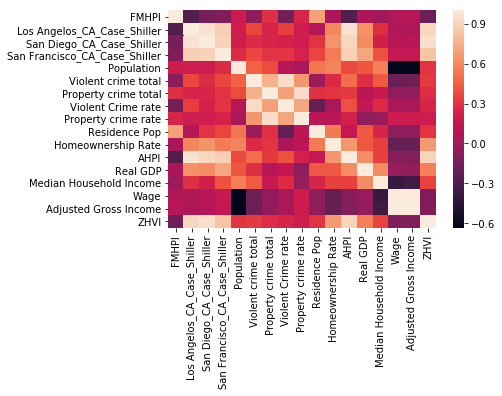

In [17]:
heatmap(state_feature_combo[1].corr())

### From the above covariance analysis, we could identify significant risk factors: Population/residence population density, Crime(violet) rate, Homeownership rate, GDP and Household income. The other two factors Case-Shiller and AHPI tracks the real estate price closely, but since they are lagged data, we would illustrate its prediction power in the ZHVI calibration section. Also, notice that some of the identified factors are regarded as "distressed" proxy factors.

### Part 2 OLS Benchmark Model

In [179]:
#risk_factor = ['Residence Pop', 'Violent Crime rate', 'Homeownership Rate', 'Real GDP', 'Median Household Income']
risk_factor = state_feature_combo[2].columns[1:-1]
risk_factor

Index(['Denver_CO_Case_Shiller', 'Population', 'Violent crime total',
       'Property crime total', 'Violent Crime rate', 'Property crime rate',
       'Residence Pop', 'Homeownership Rate', 'AHPI', 'Real GDP',
       'Median Household Income', 'Wage', 'Adjusted Gross Income'],
      dtype='object')

In [59]:
ols_train_CA = state_feature_combo[1][risk_factor][:12]
ols_test_CA = state_feature_combo[1][risk_factor][12:]
ols_y_train_CA = state_feature_combo[1]['ZHVI'][:12]
ols_y_test_CA = state_feature_combo[1]['ZHVI'][12:]
#normalize
ols_train_CA = preprocessing.scale(ols_train_CA)
ols_test_CA = preprocessing.scale(ols_test_CA)
ols_y_train_CA = preprocessing.scale(ols_y_train_CA)
ols_y_test_CA = preprocessing.scale(ols_y_test_CA)

In [60]:
regr = linear_model.LinearRegression()

## Train the model using the training sets
regr.fit(ols_train_CA, ols_y_train_CA)

# # Make predictions using the testing set
ols_pred_CA = regr.predict(ols_test_CA)
ols_pred_train_CA = regr.predict(ols_train_CA)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(ols_y_test_CA, ols_pred_CA))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ols_y_test_CA, ols_pred_CA))

Coefficients: 
 [ 1.23452577 -1.16426796  0.18023139 -0.10266208 -0.02616316 -0.08098414
 -0.0047999   0.35069531 -0.29412563  1.06884669 -0.32206973  0.35187874
 -0.0150209   0.04838705]
Mean squared error: 0.36
Variance score: 0.64


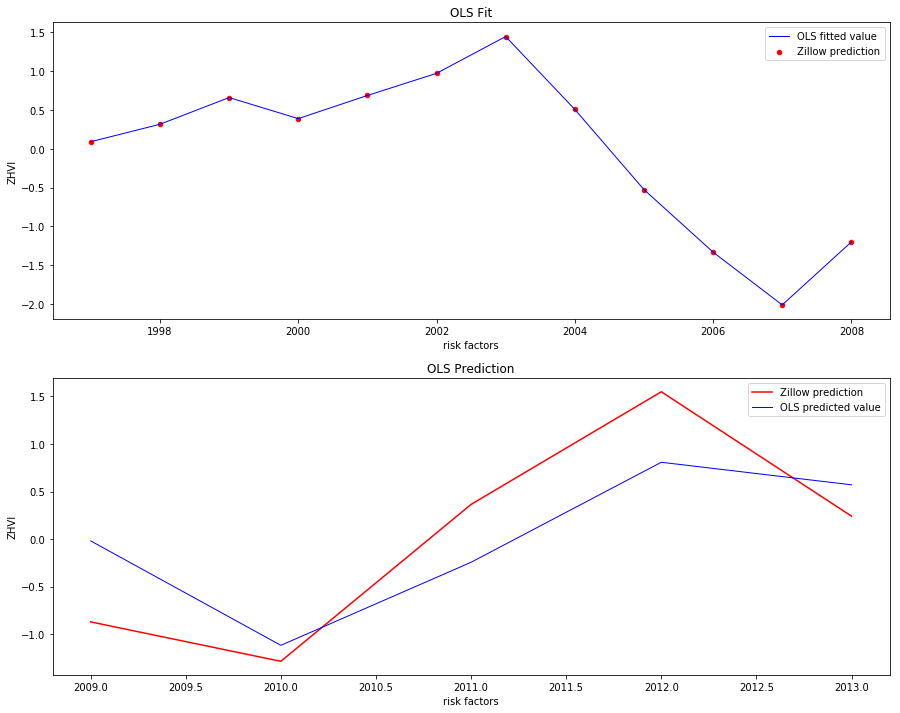

In [61]:
# Plot outputs
plt.figure(figsize = (15,12))
plt.subplot(2,1,1)
plt.scatter(np.arange(1997, 2009), ols_y_train_CA, s=20,
            c="red", label="Zillow prediction")
plt.plot(np.arange(1997, 2009), ols_pred_train_CA, color="blue", label="OLS fitted value", linewidth=1)
plt.xlabel("risk factors")
plt.ylabel("ZHVI")
plt.title("OLS Fit")
plt.legend()

plt.subplot(2,1,2)
plt.plot(np.arange(2009, 2014), ols_y_test_CA, linestyle = '-', c="red", label="Zillow prediction")
plt.plot(np.arange(2009, 2014), ols_pred_CA, color="blue", label="OLS predicted value", linewidth=1)
plt.xlabel("risk factors")
plt.ylabel("ZHVI")
plt.title("OLS Prediction")
plt.legend()
plt.show()

### Therefore we could see that OLS benchmark model with the specified risk factors can explain the current co-movements of real estate prices very well, but not necessarily explain any of the alpha. The forecast is not very good.

### Rank the risk factors by significance score, we obtain Residence Pop', 'Violent Crime rate', 'Homeownership Rate', 'Real GDP', 'Median Household Income' as potential alpha factors, and we make predictions based on that. The result looks good.

### Generalize the result for all states: use all previous except the last one

In [11]:
zillow_forecast = []
ols_forecast = []
for i in range(len(state_feature_combo)):
    risk_factor = state_feature_combo[i].columns[1:-1]
    ols_train = state_feature_combo[i][risk_factor][:-1]
    ols_test = state_feature_combo[i][risk_factor][-1:]
    ols_y_train = state_feature_combo[i]['ZHVI'][:-1]
    ols_y_test = state_feature_combo[i]['ZHVI'][-1:].values
    #normalize
    #ols_train = preprocessing.scale(ols_train)
    #ols_test = preprocessing.scale(ols_test)
    #ols_y_train = preprocessing.scale(ols_y_train)
    #ols_y_test = preprocessing.scale(ols_y_test)
    print(ols_y_test)
    zillow_forecast.append(ols_y_test[0])
    
    regr = linear_model.LinearRegression()

    ## Train the model using the training sets
    regr.fit(ols_train, ols_y_train)

    # # Make predictions using the testing set
    ols_pred = regr.predict(ols_test)
    print(ols_pred)
    ols_pred_train = regr.predict(ols_train)
    ols_forecast.append(ols_pred)
    print('For ' + states_ls[i] + ': \n')
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(ols_y_test, ols_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f \n' % r2_score(ols_y_test, ols_pred))

[4.31818182]
[-3.84381677]
For Arizona: 

Coefficients: 
 [ 1.10843204e+00  1.34930240e+02 -6.54607177e+01 -6.37414707e+01
  6.62018911e+01  6.54648130e+01 -7.91283320e+00  1.00435022e+00
 -9.24845575e-02 -1.14180789e+00 -2.89758864e-01 -3.00505720e-01
  3.32219018e-01]
Mean squared error: 66.62
Variance score: 0.00 

[7.27459016]
[145.27315368]
For California: 

Coefficients: 
 [ 3.19898872e+01 -3.38890870e+00  1.76107916e+00  2.13613741e+03
  1.72268156e+03 -3.88120550e+03 -1.76515359e+03  3.97334776e+03
  3.95814711e+02 -2.78845620e+01 -2.81578311e+01 -7.92910862e+01
  4.22261723e+01  1.27534616e+01 -1.26202748e+01]
Mean squared error: 19043.60
Variance score: 0.00 

[9.20997043]
[8.73012935]
For Colorado: 

Coefficients: 
 [ 6.72224648e-01  6.91355337e+01 -3.01392239e+01 -3.93608550e+01
  3.04698197e+01  4.00509846e+01  9.08459902e-03  1.62242874e-01
 -6.45557230e-02  4.17293529e-01  1.14236987e-01  1.45020999e-01
 -1.56831917e-01]
Mean squared error: 0.23
Variance score: 0.00 

[5

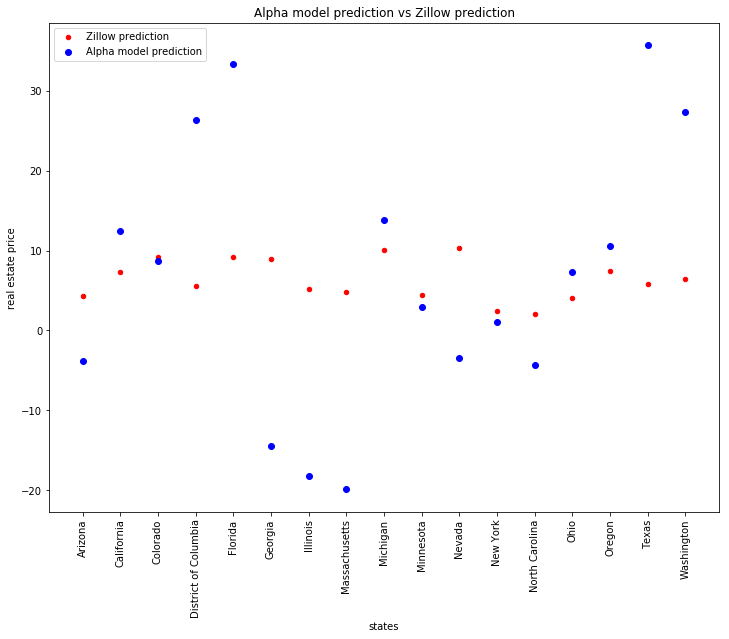

In [115]:
plt.figure(figsize = (12,9))
plt.scatter(states_ls, zillow_forecast, s=20,
            c="red", label="Zillow prediction")
plt.scatter(states_ls, ols_forecast, color="blue", label="Alpha model prediction", linewidth=1)
plt.xlabel("states")
plt.ylabel("real estate price")
plt.title("Alpha model prediction vs Zillow prediction")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

### Part 3 Momentum factor and Seasonal Trend

In [116]:
ZHVI = []
lagged_ZHVI = []
for i in range(len(state_feature_combo)):
    ls = state_feature_combo[i]['ZHVI'][:-1]
    lagged_ls = state_feature_combo[i]['ZHVI'][1:]
    ZHVI.append(ls)
    lagged_ZHVI.append(lagged_ls)

In [143]:
corr_lag = []
for i in range(len(ZHVI)):
    corr_lag.append(np.corrcoef(ZHVI[i], lagged_ZHVI[i])[0][1])
corr_lag_df = pd.DataFrame({'Correlation': corr_lag})
corr_lag_df.index = states_ls
corr_lag_df.T

,Arizona,California,Colorado,District of Columbia,Florida,Georgia,Illinois,Massachusetts,Michigan,Minnesota,Nevada,New York,North Carolina,Ohio,Oregon,Texas,Washington
Correlation,0.538452,0.743866,0.809207,0.805025,0.751113,0.760394,0.779072,0.866084,0.817453,0.844187,0.650274,0.876809,0.773174,0.844744,0.674503,0.449153,0.744018


### Momentum factor as alpha factor prediction

In [160]:
zillow_forecast = []
momentum_forecast = []
for i in range(len(state_feature_combo)):
    ols_train = ZHVI[i][:-1]
    ols_test = ZHVI[i][-1:]
    ols_y_train = lagged_ZHVI[i][:-1]
    ols_y_test = lagged_ZHVI[i][-1:].values
    #normalize
    #ols_train = preprocessing.scale(ols_train)
    #ols_test = preprocessing.scale(ols_test)
    #ols_y_train = preprocessing.scale(ols_y_train)
    #ols_y_test = preprocessing.scale(ols_y_test)
    zillow_forecast.append(ols_y_test[0])
    regr = linear_model.LinearRegression()

    ## Train the model using the training sets
    regr.fit(np.array(ols_train).reshape(-1,1), ols_y_train)

    # # Make predictions using the testing set
    ols_pred = regr.predict(np.array(ols_test).reshape(-1,1))
    ols_pred_train = regr.predict(np.array(ols_train).reshape(-1,1))
    momentum_forecast.append(ols_pred)
    print('For ' + states_ls[i] + ': \n')
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(ols_y_test, ols_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f \n' % r2_score(ols_y_test, ols_pred))

For Arizona: 

Coefficients: 
 [0.55362033]
Mean squared error: 26.96
Variance score: 0.00 

For California: 

Coefficients: 
 [0.79246826]
Mean squared error: 100.41
Variance score: 0.00 

For Colorado: 

Coefficients: 
 [0.7965729]
Mean squared error: 4.38
Variance score: 0.00 

For District of Columbia: 

Coefficients: 
 [0.81709303]
Mean squared error: 30.79
Variance score: 0.00 

For Florida: 

Coefficients: 
 [0.75865404]
Mean squared error: 2.52
Variance score: 0.00 

For Georgia: 

Coefficients: 
 [0.75119972]
Mean squared error: 1.33
Variance score: 0.00 

For Illinois: 

Coefficients: 
 [0.70370745]
Mean squared error: 3.03
Variance score: 0.00 

For Massachusetts: 

Coefficients: 
 [0.8620119]
Mean squared error: 4.56
Variance score: 0.00 

For Michigan: 

Coefficients: 
 [0.83008457]
Mean squared error: 0.02
Variance score: 0.00 

For Minnesota: 

Coefficients: 
 [0.8376961]
Mean squared error: 11.16
Variance score: 0.00 

For Nevada: 

Coefficients: 
 [0.69495769]
Mean squ

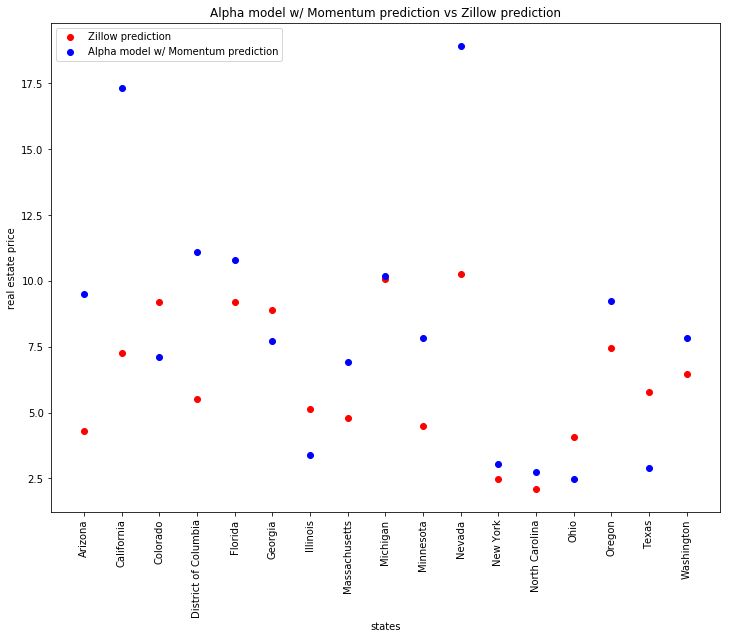

In [173]:
plt.figure(figsize = (12,9))
plt.scatter(states_ls, zillow_forecast,
            c="red", label="Zillow prediction")
plt.scatter(states_ls, momentum_forecast, color="blue", label="Alpha model w/ Momentum prediction", linewidth=1)
plt.xlabel("states")
plt.ylabel("real estate price")
plt.title("Alpha model w/ Momentum prediction vs Zillow prediction")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

### After adding real estate price, real gdp and median household income momentum factors, the prediction looks much better.

In [168]:
explained_variance_score(zillow_forecast, momentum_forecast, multioutput='uniform_average')

-1.082374844038783

In [170]:
explained_variance_score(zillow_forecast, ols_forecast, multioutput='uniform_average')

-211.64615804223925

### Part 4 Random Forest with Boosting Model

### Use xgboost package: gradient boosting decision tree

In [12]:
best_params={'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 10000, 'reg_alpha': 1e-05, 'reg_lambda': 0.01, 'subsample': 0.95}

In [51]:
xgboost_forecast = []
xgboost_fit = []
zillow_train = []
xgboost_model = []
for i in range(len(state_feature_combo)):
    risk_factor = state_feature_combo[i].columns[2:-1]
    X_train = state_feature_combo[i][risk_factor][:-1]
    y_train = state_feature_combo[i]['ZHVI'][:-1]
    X_test = state_feature_combo[i][risk_factor][-1:]
    y_test = state_feature_combo[i]['ZHVI'][-1:].values
    best_xgb_model = xgboost.XGBRegressor(colsample_bytree=1,
                     gamma=0,                 
                     learning_rate=0.1,
                     max_depth=3,
                     min_child_weight=1,
                     n_estimators=10000,                                                                    
                     reg_alpha=1e-05,
                     reg_lambda=0.01,
                     subsample=0.95,
                     seed=1992)
    best_xgb_model.fit(X_train,y_train)
    y_pred = best_xgb_model.predict(X_test)
    y_train_pred = best_xgb_model.predict(X_train)
    xgboost_fit.append(y_train_pred)
    xgboost_forecast.append(y_pred)
    zillow_train.append(y_train)
    xgboost_model.append(best_xgb_model)

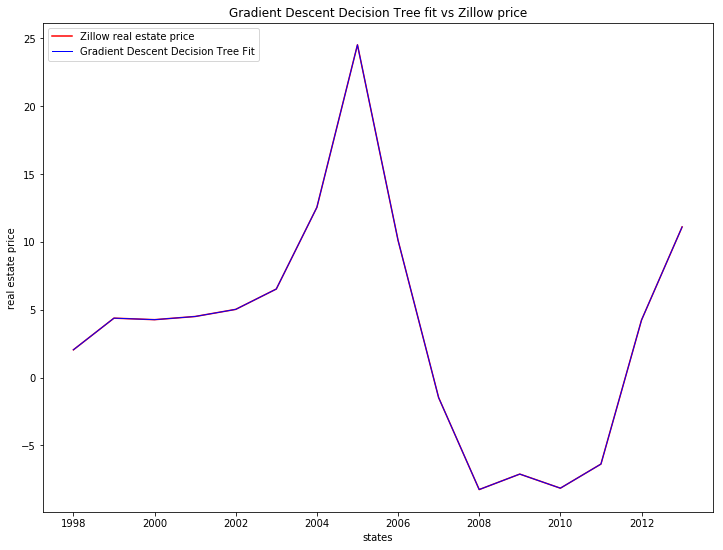

In [43]:
plt.figure(figsize = (12,9))
plt.plot(zillow_train[1].index, zillow_train[14].values,
            c="red", label="Zillow real estate price")
plt.plot(zillow_train[1].index, xgboost_fit[14], color="blue", label="Gradient Descent Decision Tree Fit", linewidth=1)
plt.xlabel("states")
plt.ylabel("real estate price")
plt.title("Gradient Descent Decision Tree fit vs Zillow price")
#plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

### Results for all states

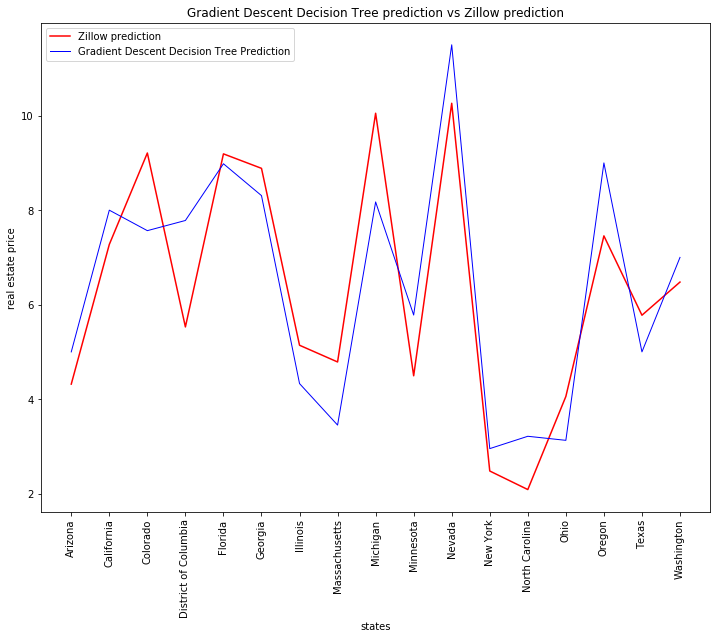

In [30]:
plt.figure(figsize = (12,9))
plt.plot(states_ls, zillow_forecast,
            c="red", label="Zillow prediction")
plt.plot(states_ls, xgboost_forecast, color="blue", label="Gradient Descent Decision Tree Prediction", linewidth=1)
plt.xlabel("states")
plt.ylabel("real estate price")
plt.title("Gradient Descent Decision Tree prediction vs Zillow prediction")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

In [44]:
mean_squared_error(zillow_forecast, xgboost_forecast)

1.4067722305348478

In [45]:
explained_variance_score(zillow_forecast, xgboost_forecast)

0.7731323790737801

In [72]:
F_i = pd.DataFrame(list(OrderedDict(sorted(xgboost_model[0].get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True)).items())[0:])
F_i.columns=['Feature',states_abbrev[0]]
F_i = F_i[F_i['Feature'] != 'AHPI']
for i in range(len(states_ls)-1):
    df = pd.DataFrame(list(OrderedDict(sorted(xgboost_model[i+1].get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True)).items())[0:])
    df.columns=['Feature',states_abbrev[i+1]]
    F_i = F_i.merge(df, left_on='Feature', right_on='Feature', how='left')
F_i = F_i.set_index('Feature')
F_i.columns.name = 'f-score'
F_i

f-score,AZ,CA,CO,DC,FL,GA,IL,MA,MI,MN,NV,NY,NC,OH,OR,TX,WA
Feature,,,,,,,,,,,,,,,,,
Population,242,34,170.0,171,72.0,143,236,276,228,220.0,251,171.0,159,172.0,213.0,214.0,161.0
Property crime total,103,23,100.0,85,35.0,75,34,25,16,26.0,72,61.0,44,20.0,46.0,57.0,61.0
Violent Crime rate,54,2,NaN,25,19.0,30,2,1,9,NaN,17,18.0,15,14.0,NaN,1.0,35.0
Violent crime total,45,38,60.0,86,55.0,100,88,139,67,66.0,84,129.0,54,92.0,45.0,30.0,63.0
Wage,40,28,20.0,11,29.0,19,17,13,2,50.0,44,13.0,40,9.0,35.0,9.0,4.0
Homeownership Rate,35,53,26.0,5,28.0,52,31,20,47,38.0,29,31.0,18,33.0,27.0,79.0,50.0
Real GDP,22,53,39.0,5,6.0,24,33,2,29,21.0,23,28.0,82,1.0,48.0,35.0,10.0
Property crime rate,20,5,1.0,39,NaN,4,35,1,3,NaN,5,2.0,9,21.0,10.0,NaN,5.0
Median Household Income,15,7,44.0,15,12.0,31,32,14,48,15.0,49,NaN,33,37.0,76.0,55.0,55.0
